In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from tensorflow.keras.metrics import Precision, Recall
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

# Clustering Instructions:

In [3]:
#1. Load the dataset.
df_flight=pd.read_csv("C:/Users/Dell/Downloads/flight_df - flight_df.csv")
df_flight.head(5)

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0


In [4]:
#2. Explore the data.df_flight.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                20000 non-null  int64
 1   Class                              20000 non-null  int64
 2   Flight Distance                    20000 non-null  int64
 3   Inflight wifi service              20000 non-null  int64
 4   Departure/Arrival time convenient  20000 non-null  int64
 5   Ease of Online booking             20000 non-null  int64
 6   Gate location                      20000 non-null  int64
 7   Food and drink                     20000 non-null  int64
 8   Online boarding                    20000 non-null  int64
 9   Seat comfort                       20000 non-null  int64
 10  Inflight entertainment             20000 non-null  int64
 11  On-board service                   20000 non-null  int64
 12  Leg room service  

In [5]:
df_flight.describe()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,39.477250,2.027800,1188.548000,2.727950,3.056100,2.751100,2.971350,3.202100,3.255300,3.439100,...,3.623650,3.302850,3.635550,3.282650,14.318350,14.698250,0.490650,0.817850,0.687900,0.43305
std,15.108901,0.963054,1001.136957,1.326886,1.531134,1.396799,1.279575,1.332383,1.348485,1.323434,...,1.186837,1.259131,1.184017,1.311734,36.451829,36.899857,0.499925,0.385978,0.463362,0.49551
min,7.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,27.000000,1.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
50%,40.000000,2.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
75%,51.000000,3.000000,1733.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,1.00000
max,85.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
# Prepare the data for modeling.
df_flight.shape

(20000, 23)

In [7]:
Xkmeans = df_flight[df_flight.columns[3:16]]
Xkmeans

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service
0,2,3,3,3,2,2,2,2,3,3,3,3,3
1,5,5,5,5,3,4,4,4,4,4,4,4,4
2,3,5,3,4,3,3,3,3,3,3,4,4,5
3,3,5,5,5,3,4,4,3,3,3,3,4,3
4,4,3,3,3,4,4,4,4,1,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5,3,2,2,5,5,4,5,1,5,4,5,5
19996,4,3,3,3,4,4,4,4,2,3,3,1,4
19997,2,5,2,1,4,2,4,4,5,2,4,3,5
19998,2,5,5,5,2,2,2,2,2,3,4,2,3


In [8]:
scaler = StandardScaler()
Xkmeans_scaled = scaler.fit_transform(Xkmeans)
Xkmeans_scaled

array([[-0.54862899, -0.03664044,  0.17819765, ..., -0.52548564,
        -0.24052902, -0.5367878 ],
       [ 1.71236004,  1.26961399,  1.61007909, ...,  0.3171114 ,
         0.55368931,  0.30781577],
       [ 0.20503402,  1.26961399,  0.17819765, ...,  0.3171114 ,
         0.55368931,  1.15241934],
       ...,
       [-0.54862899,  1.26961399, -0.53774308, ...,  0.3171114 ,
        -0.24052902,  1.15241934],
       [-0.54862899,  1.26961399,  1.61007909, ...,  0.3171114 ,
        -1.03474735, -0.5367878 ],
       [ 0.95869703, -0.68976765, -0.53774308, ...,  0.3171114 ,
        -0.24052902,  0.30781577]])

C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

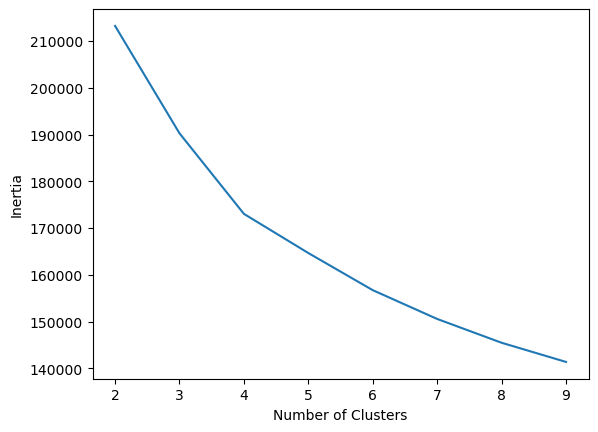

In [9]:
#  Use a KMeans model to cluster the passengers into an optimal number of clusters
ks = range(2,10)
inertia = []

for k in ks:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(Xkmeans_scaled)
  inertia.append(model.inertia_)



plt.plot(ks, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

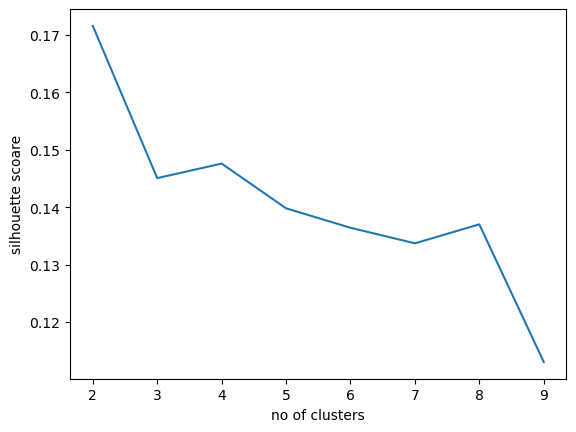

In [10]:
ks =range(2,10)
sil =[]

for k in ks:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(Xkmeans_scaled)
  sil.append(silhouette_score(Xkmeans_scaled, model.labels_))

plt.plot(ks, sil)
plt.xlabel('no of clusters')
plt.ylabel('silhouette scoare')
plt.show()

In [11]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several t

In [12]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(Xkmeans_scaled)
df_flight['cluster'] = km.predict(Xkmeans_scaled)

C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
df_flight.groupby(['cluster']).agg({
    'Age': ['count', 'min', 'max', 'median', 'mean'],
    'Departure Delay in Minutes': ['min', 'max', 'median', 'mean'],
    'Arrival Delay in Minutes': ['min', 'max', 'median', 'mean'],
    'satisfied': ['mean'],
    'Business Travel': ['mean'],
    'Loyal Customer': ['mean']
})

Age                           Departure Delay in Minutes        \
        count min max median       mean                        min   max   
cluster                                                                    
0        4600   7  78   31.0  33.712826                          0   519   
1        4719   7  85   41.0  40.508159                          0  1305   
2        4835   7  85   43.0  42.026267                          0   365   
3        5846   7  80   42.0  41.072699                          0   426   

                          Arrival Delay in Minutes                          \
        median       mean                      min   max median       mean   
cluster                                                                      
0          0.0  16.281957                        0   516    0.0  16.902391   
1          0.0  12.740411                        0  1280    0.0  12.917779   
2          0.0  14.573733                        0   383    0.0  15.291417   
3          0.0  13.835785                        0   459    0.0  13.910537   

        satisfied Business Travel Loyal Customer  
             mean            mean           mean  
cluster                                           
0        0.138043        0.564130       0.701522  
1        0.566645        0.731087       0.839585  
2        0.232885        0.654188       0.850052  
3        0.722887        0.778310       0.865207

# Modeling Instructions:

In [14]:
#Use random_state = 42 for your train_test_split
x = df_flight.drop(columns = 'satisfied')
y = df_flight['satisfied']

trainx, testx, trainy, testy = train_test_split(x,y, random_state = 42)

In [15]:
# Use PCA to prepare the data for modeling
preprocess_pip = make_pipeline(StandardScaler(), PCA(n_components=.9))
preprocess_pip.fit(trainx)
Xtrain_prep = preprocess_pip.transform(trainx)
Xtest_prep = preprocess_pip.transform(testx)

In [16]:
Xtrain_prep.shape

(15000, 15)

In [17]:
Xtest_prep.shape

(5000, 15)

In [18]:
df_flight.shape

(20000, 24)

In [19]:
# Create 3 different versions of a sequential model
seq_model1 = Sequential()
seq_model1.add(Dense(Xtest_prep.shape[1]+1, input_dim = Xtest_prep.shape[1], activation='relu'))
seq_model1.add(Dense(1, activation='sigmoid'))


In [20]:
seq_model1.compile(loss='bce', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

In [21]:
history = seq_model1.fit(Xtrain_prep, trainy,
          validation_data=(Xtest_prep, testy),
          epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4642 - accuracy: 0.7901 - precision: 0.7733 - recall: 0.7312 - val_loss: 0.3380 - val_accuracy: 0.8690 - val_precision: 0.8553 - val_recall: 0.8357
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3171 - accuracy: 0.8743 - precision: 0.8695 - recall: 0.8361 - val_loss: 0.2970 - val_accuracy: 0.8842 - val_precision: 0.8734 - val_recall: 0.8535
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2845 - accuracy: 0.8844 - precision: 0.8816 - recall: 0.8478 - val_loss: 0.2712 - val_accuracy: 0.8920 - val_precision: 0.8915 - val_recall: 0.8516
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2631 - accuracy: 0.8921 - precision: 0.8928 - recall: 0.8544 - val_loss: 0.2543 - val_accuracy: 0.8980 - val_precision: 0.8962 - val_recall: 0.8619
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2496 - accuracy: 0.8952 - pr

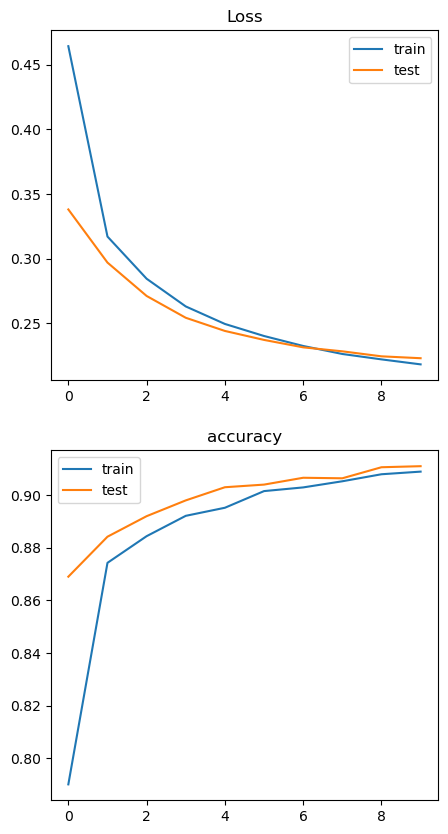

In [22]:
plot_history(history, metric='accuracy')

In [23]:
seq_model2 = Sequential()
seq_model2.add(Dense(7, input_dim = Xtest_prep.shape[1], activation='relu'))
seq_model2.add(Dense(1, activation='sigmoid'))

seq_model2.compile(loss='bce', optimizer='adam', metrics=['accuracy', Precision(), Recall()])


In [24]:
history2 = seq_model2.fit(Xtrain_prep, trainy,
          validation_data=(Xtest_prep, testy),
          epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4671 - accuracy: 0.7930 - precision_1: 0.7325 - recall_1: 0.8249 - val_loss: 0.3563 - val_accuracy: 0.8638 - val_precision_1: 0.8410 - val_recall_1: 0.8413
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3398 - accuracy: 0.8637 - precision_1: 0.8483 - recall_1: 0.8357 - val_loss: 0.3186 - val_accuracy: 0.8752 - val_precision_1: 0.8643 - val_recall_1: 0.8409
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3108 - accuracy: 0.8770 - precision_1: 0.8696 - recall_1: 0.8434 - val_loss: 0.2988 - val_accuracy: 0.8842 - val_precision_1: 0.8731 - val_recall_1: 0.8539
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2907 - accuracy: 0.8849 - precision_1: 0.8800 - recall_1: 0.8513 - val_loss: 0.2821 - val_accuracy: 0.8920 - val_precision_1: 0.8874 - val_recall_1: 0.8567
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss

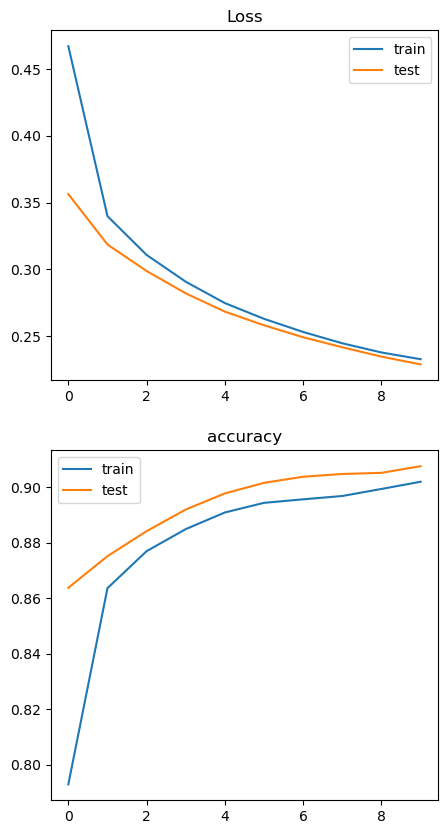

In [25]:
plot_history(history2, metric='accuracy')

In [29]:
# Use some form of regularization with at least one model.
seq_model3 = Sequential()
seq_model3.add(Dense(7, input_dim = Xtest_prep.shape[1], activation='relu'))
seq_model3.add(Dense(1, activation='sigmoid'))
seq_model3.add(Dropout(0.5))
seq_model3.add(Dense(1, activation = 'sigmoid'))
seq_model3.compile(loss='bce', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

In [30]:
history3 = seq_model3.fit(Xtrain_prep, trainy,
          validation_data=(Xtest_prep, testy),
          epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6711 - accuracy: 0.5054 - precision_3: 0.4394 - recall_3: 0.5012 - val_loss: 0.6068 - val_accuracy: 0.7028 - val_precision_3: 0.9768 - val_recall_3: 0.3140
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6089 - accuracy: 0.5932 - precision_3: 0.5234 - recall_3: 0.7126 - val_loss: 0.5560 - val_accuracy: 0.8664 - val_precision_3: 0.9366 - val_recall_3: 0.7382
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5927 - accuracy: 0.6451 - precision_3: 0.5600 - recall_3: 0.8555 - val_loss: 0.5305 - val_accuracy: 0.8840 - val_precision_3: 0.8965 - val_recall_3: 0.8245
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5844 - accuracy: 0.6531 - precision_3: 0.5637 - recall_3: 0.8923 - val_loss: 0.5129 - val_accuracy: 0.8834 - val_precision_3: 0.8775 - val_recall_3: 0.8460
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss

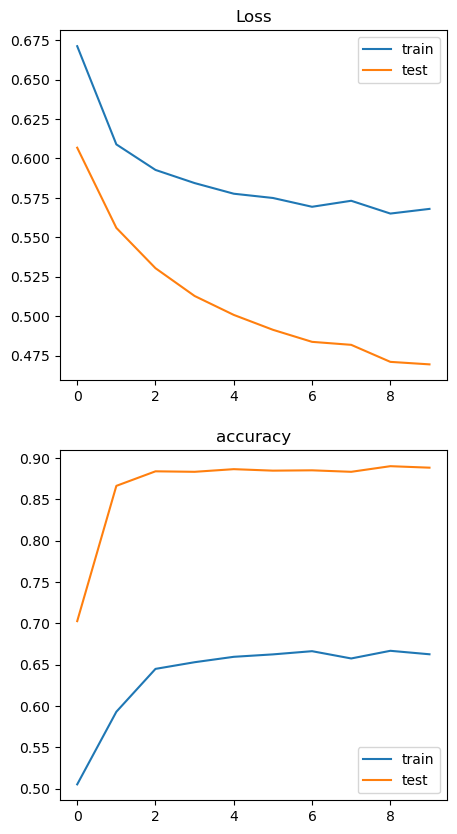

In [31]:
plot_history(history3, metric='accuracy')

In [32]:
#Choose a final model and justify your choice.
#Evaluate your final model with multiple metrics.
#Based on those metrics, explain in writing how well your model will solve the business problem.
#The best model is model 1, it has the best metrics values. 

### Final Evaluation Model

In [35]:
ypred_test = seq_model1.predict(Xtest_prep)
ypred_test[:5]

157/157 [==============================] - 0s 1ms/step


array([[0.07365201],
       [0.12633076],
       [0.01343393],
       [0.03286094],
       [0.326616  ]], dtype=float32)

In [38]:
ypred_test = np.round(ypred_test)
y_pred_test[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2857
           1       0.91      0.88      0.89      2143

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



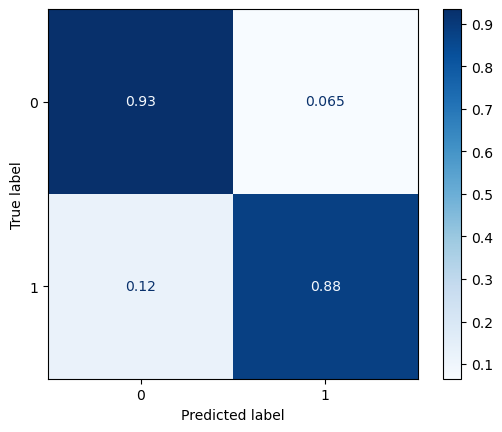

In [41]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(testy, ypred_test))
 
ConfusionMatrixDisplay.from_predictions(testy, ypred_test, cmap='Blues',
                                       normalize='true');

In [33]:
df_flight.head(2)

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied,cluster
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,2,0,0,0,1,1,0,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,18,2,0,1,1,1,3


Model 1 is also the best model because it has a very low loss value and the train and test lines are almost superimposed so less the model is 
complex better the prediction is. 
The model take some features and classify it in classes. 
So The model predict 2 classes satisfied customer and non satisfied customers. 93% of satisfied ones are true and 12% of them are false predictions. 
88% of non satisfied customers predictions are true and 6.5% of them are false predictions. 
For skateholders, we can take features taken by the model (Inflight wifi service, Departure/Arrival time convenient,Ease of Online booking ,             
Gate locationFood and drink , Online boarding , Seat comfort , Inflight entertainment , On-board service , Leg room service                   
Baggage handling                   
Checkin service                    
Inflight service                   
Cleanliness )       
and try to improve services to reach a best level of satisfied customers. 